Figures for Section 1.1

In [51]:
# data folder path to be used to concatenate strings
datapath = "../../data/"
library(stringr)
library(dplyr)
library(tidyr)
knitr::opts_chunk$set(warning = FALSE, message = FALSE)

Figure 1.1

 Wolfer’s sunspot numbers from 1700 to 1994.

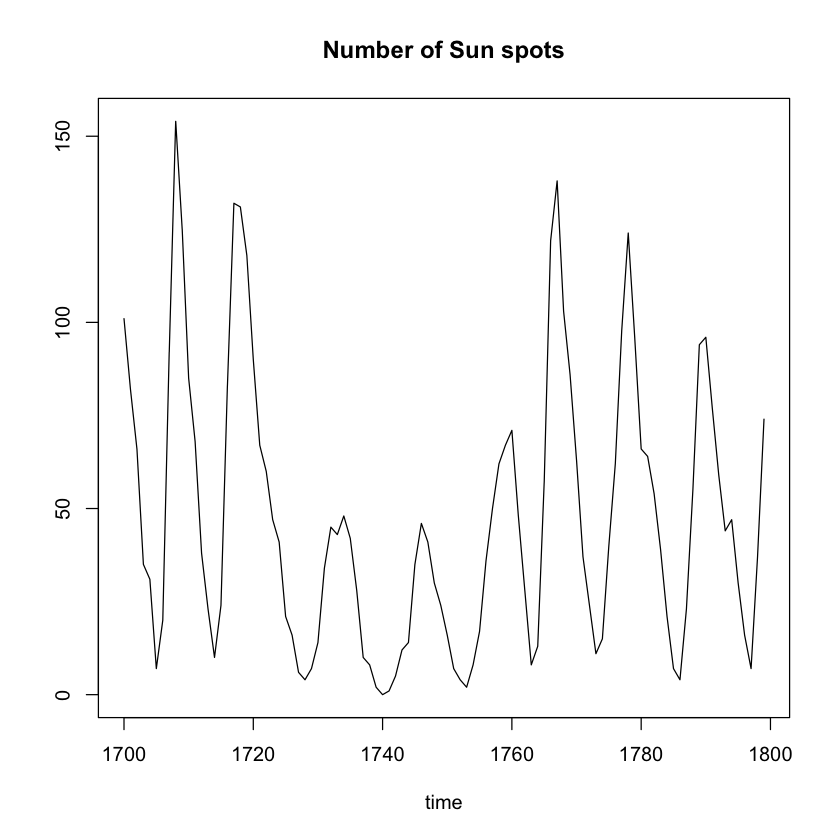

In [14]:
# read data by the data path
spots = read.table(str_c(datapath,"sunspots.dat"))
spots = ts(spots, start=1700, frequency=1)
plot(spots, xlab="time", ylab="", main="Number of Sun spots")

Figure 1.2

Number of lynx trapped in the MacKenzie River district between 1821 and 1934.

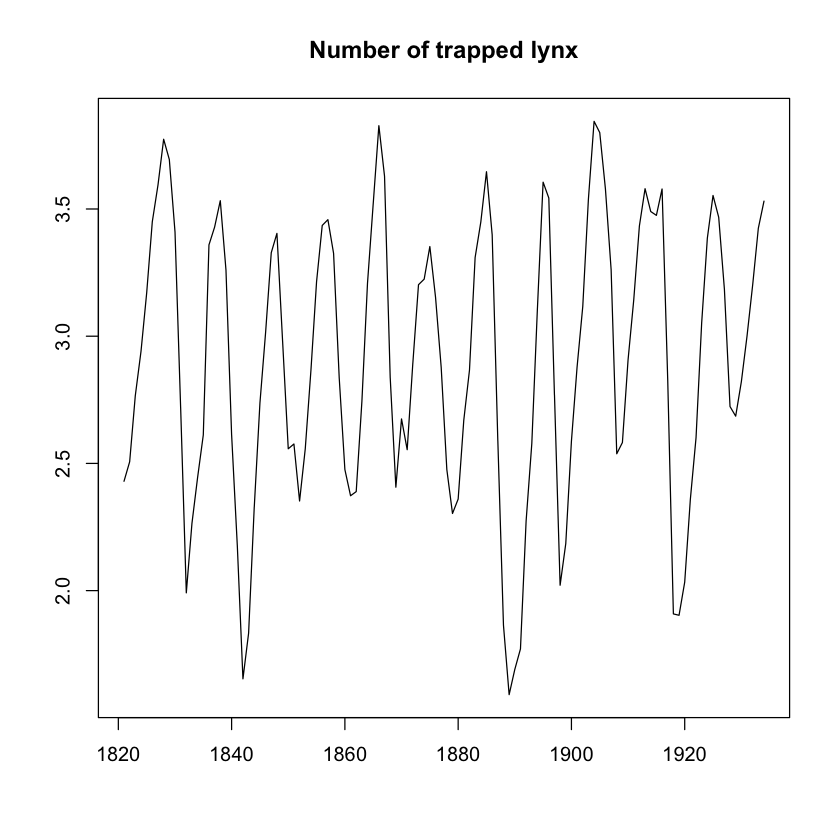

In [16]:
lynx = read.table(str_c(datapath,"lynx.dat"))
lynx = ts(log10(lynx), start=1821, frequency=1)
plot(lynx, xlab="", ylab="", main="Number of trapped lynx")

Figure 1.3

Yields of Treasury bills from July 17, 1959, to December 31, 1999.

In [115]:
# clean bills data in files 'bills03.dat', 'bills06.dat','bills12.dat'
cleanBills <- function(fn){
    filepath = str_c(datapath, fn)
    # # print the previous 15 lines to check if there are invalid lines
    # print(readLines(filepath, n=15))

    # read data skipping n valid lines
    # generate a dataframe
    data = read.table(filepath,header = FALSE, sep=",", skip = 14)

    # the original column name is 'V1'
    # Split one column into two: Date and Value, by space
    data <- data %>% separate(V1, c('Date', 'Value'), sep = ' (?=[^ ]+$)')

    # convert class type of values into numeric
    data$Value <- as.numeric(data$Value)
    
    return(data$Value)
}
    

In [116]:
bills03 = cleanBills("bills03.dat")
bills06 = cleanBills("bills06.dat")
bills12 = cleanBills("bills12.dat")

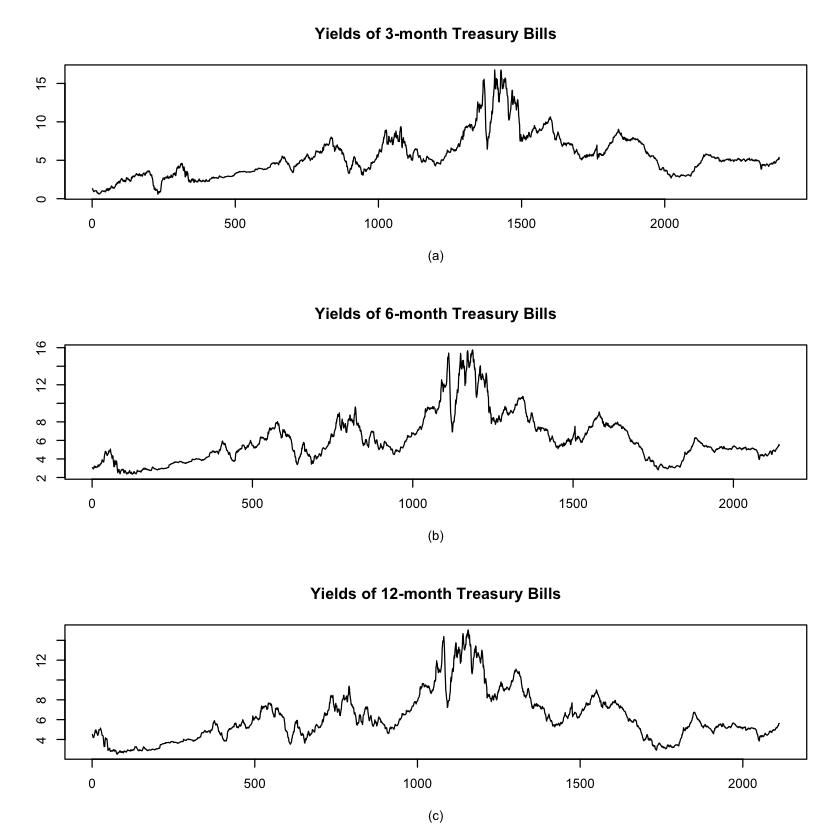

In [117]:
par(mfrow=c(3,1))
plot.ts(bills03, xlab="(a)", ylab="", main="Yields of 3-month Treasury Bills")
plot.ts(bills06, xlab="(b)", ylab="", main="Yields of 6-month Treasury Bills")
plot.ts(bills12, xlab="(c)", ylab="", main="Yields of 12-month Treasury Bills")

Figure 1.4 

S&P 500 from January 3, 1972, to December 31, 1999.

In [182]:
print(readLines(str_c(datapath,"sp500.dat.rtf"), n=40))

 [1] "{\\rtf1\\ansi\\ansicpg1252\\cocoartf949\\cocoasubrtf270"                        
 [2] "{\\fonttbl\\f0\\fmodern\\fcharset0 Courier;}"                                   
 [3] "{\\colortbl;\\red255\\green255\\blue255;}"                                      
 [4] "\\margl1440\\margr1440\\vieww18120\\viewh13020\\viewkind0"                      
 [5] "\\deftab720"                                                                    
 [6] "\\pard\\pardeftab720\\ql\\qnatural"                                             
 [7] ""                                                                               
 [8] "\\f0\\fs26 \\cf0 An excell format can be obtained from http://quote.yahoo.com\\"
 [9] "Click SP500-->max(in the chart) --> Table (in the chart)\\"                     
[10] "Date\tOpen\tHigh\tLow\tClose\\"                                                 
[11] "19-Jan- 0 1455.14 1461.39 1448.68 1455.90\\"                                    
[12] "18-Jan- 0 1465.15 1465.15 1451.30 145

In [159]:
sp_data = read.table(str_c(datapath,"sp500.dat.rtf"),header = FALSE, sep=",", skip = 22)

# remove the last string '\'
sp_data$V1 <- str_sub(sp_data$V1, end = -2)

# replace tab '\t' with space
sp_data$V1 <- gsub("\t", " ", sp_data$V1)
# slice the last 7 characters
str_sub(sp_data$V1, -7,-1)
# convert string to numeric



sp_data500 <- sp_data[, -6:-1]
sp_data500

# split data into 5 columns
# sp_data <- sp_data %>% separate(V1, c('Date', 'Open', 'High', 'Low', 'Close'), sep = ' (?=[^ ]+$)')
# sp_data

Warning message in rbind(parts$upper, chars$ellip_v, parts$lower, deparse.level = 0L):
"number of columns of result is not a multiple of vector length (arg 2)"


1   
2   
3   
4   
5   
6   
7   
8   
9   
10  
11  
12  
13  
14  
15  
16  
17  
18  
19  
20  
21  
22  
23  
24  
25  
26  
27  
28  
29  
30  
... 
7047
7048
7049
7050
7051
7052
7053
7054
7055
7056
7057
7058
7059
7060
7061
7062
7063
7064
7065
7066
7067
7068
7069
7070
7071
7072
7073
7074
7075
7076

In [192]:
a <- gsub("\t", "  ", sp_data$V1)

b <- str_sub(a, -7,-1)

In [212]:
a[29]

[1] "19-Nov-99  1424.94  1424.94  1417.54  1422"

In [204]:
length(a[20])

[1] 1

In [207]:
# split a string by the last 6 characters.
# it contains complex situations
# if I use space to split the data, some rows whose dates do not 
# have complete format will produce an extra space before the dates
# so if i split the data into 5 columns, the last column in those rows 
# will contain two vlaues!!!
# I need to create a function to deal with that
as.numeric(str_sub(a, start= -7))

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"


[1] 1469.25 1464.47 1463.46 1457.66 1457.10 1458.34 1435.99 1433.43 1418.09
  [10] 1421.03 1418.78 1413.33 1403.17 1415.22 1417.04 1408.11 1403.88 1409.17
  [19] 1423.33 1433.30 1409.04 1397.72 1389.07 1407.83 1416.62 1417.08 1404.64
  [28] 1420.94      NA 1424.94 1410.71 1420.07 1394.39 1396.06 1381.46 1373.46
  [37] 1365.28 1377.01 1370.23 1362.64 1354.93 1347.74 1354.12 1362.93 1342.44
  [46] 1296.71 1281.91 1293.63 1301.65 1283.61 1289.43 1261.32 1254.13 1247.41
  [55] 1283.42 1285.55 1313.04 1335.21 1336.02 1317.64 1325.40 1301.35 1304.60
  [64] 1282.81 1282.71 1268.37 1282.20 1283.31 1277.36 1280.41 1310.51 1307.58
  [73] 1335.53 1335.42 1318.48 1317.97 1336.29 1344.13 1351.66 1347.66 1347.66
  [82] 1344.15 1350.45 1357.24 1319.11 1331.07 1320.41 1324.02 1348.27 1362.01
  [91] 1381.79 1363.50 1360.22 1336.61 1323.59 1332.84 1344.16 1330.77 1327.68
 [100] 1298.16 1301.93 1281.43 1297.80 1300.29 1313.71 1305.33 1322.18 1328.05
 [109] 1328.72 1341.03 1365.40 1362.84 1347.76 1356.94 1360.97 1379.29 1377.10
 [118] 1407.65 1418.78 1409.62 1398.17 1393.56 1399.10 1403.28 1394.42 1395.86
 [127] 1388.12 1391.22 1380.96 1372.71 1351.45 1331.35 1315.31 1315.78 1333.06
 [136] 1335.88      NA 1342.84 1339.90 1330.41 1301.16      NA 1293.64 1302.82
 [145] 1318.64 1317.33 1334.52 1327.75 1299.54 1294.81 1294.26 1301.84 1281.41
 [154] 1304.76 1284.40 1306.65 1330.29 1338.83 1344.23 1333.32 1339.49 1337.80
 [163] 1367.56      NA 1355.61 1340.30      NA 1332.05 1347.31      NA 1354.63
 [172] 1335.18 1342.83 1350.91 1362.80 1360.04 1356.85 1358.82 1336.12 1306.17
 [181] 1289.48      NA 1322.85 1328.44 1349.82 1358.63 1348.35 1343.98 1326.89
 [190] 1317.89 1321.12 1293.72 1286.37 1300.75 1310.17 1282.80 1289.99 1268.59
 [199] 1262.14 1297.01 1299.29 1316.55 1297.82 1306.38 1307.26 1294.59 1297.68
 [208] 1286.84 1279.84 1282.73 1275.47 1246.64 1227.70 1225.50 1236.16 1238.33
 [217] 1245.02 1253.41 1271.18 1272.14 1239.22 1237.28 1224.03 1241.87 1230.13
 [226] 1254.04 1223.55 1216.14 1243.77 1239.40 1248.49 1272.07 1261.99      NA
 [235] 1279.64 1265.37 1243.17 1252.31 1233.98 1225.19 1235.16 1256.62      NA
 [244] 1243.26 1212.19 1234.40 1239.51 1263.88 1275.09 1269.73 1272.34 1244.78
 [253] 1228.10 1229.23 1231.93 1241.81 1225.49 1226.27 1228.54 1203.57 1202.84
 [262] 1188.03 1179.98 1161.94 1162.83 1141.20 1166.46 1165.02 1183.49 1181.38
 [271] 1187.70 1176.74 1150.14 1171.25 1175.28 1163.63 1192.33 1186.87 1182.99
 [280] 1188.21 1163.55 1152.61 1144.48 1139.32 1135.87 1125.72 1117.69 1120.97
 [289] 1128.26 1130.20 1141.01 1133.85 1118.67 1110.84 1111.60 1098.67 1085.93
 [298] 1068.09 1065.34 1072.32 1070.67 1078.48 1069.92 1063.93 1062.39 1056.42
 [307] 1047.49 1005.53  994.80  997.71  984.39  959.44  970.68  984.59  988.56
 [316] 1002.60  986.39 1017.01 1049.02 1048.69 1044.75 1042.72 1066.09 1029.63
 [325] 1023.89 1020.09 1018.87 1045.48 1037.68 1029.72 1009.06  980.19 1006.20
 [334] 1023.46  973.89  982.26  990.48  994.26  957.28 1027.14 1042.59 1084.19
 [343] 1092.85 1088.14 1081.24 1091.60 1098.06 1101.20 1083.67 1062.75 1074.91
 [352] 1084.22 1068.98 1083.14 1089.45 1089.63 1081.43 1072.12 1112.44 1120.67
 [361] 1142.95 1125.21 1130.24 1147.27 1140.80 1139.75 1164.08 1165.07 1184.10
 [370] 1186.75 1183.99 1174.81 1177.58 1165.19 1164.33 1158.56 1166.38 1154.66
 [379] 1157.33 1146.42 1148.56 1133.84 1138.49 1133.20 1129.28 1132.88 1119.49
 [388] 1103.21 1100.65 1106.37 1107.11 1087.59 1077.01 1098.84 1094.58 1112.28
 [397] 1118.41 1115.72 1113.86 1094.83 1082.73 1093.22 1090.98 1090.82 1097.60
 [406] 1092.23 1094.02 1110.47 1114.64 1119.06 1109.52 1105.82 1108.73 1117.37
 [415] 1118.86 1115.79 1106.64 1108.14 1095.14 1104.92 1115.50 1122.07      NA
 [424] 1111.75 1094.62 1085.11 1086.54 1107.90 1119.58 1130.54 1126.67 1123.65
 [433] 1122.72 1108.17 1119.32 1115.75 1109.69 1110.67 1101.65 1109.55 1121.38
 [442] 1122.70 1120.01 1108.15 1101.75 1093.60 1095.44 1100.80 1101.93 1105.65
 [451] 1095.55 1099.16 1089.74 1085.52 1080.45 1079.2

In [193]:
c <- as.data.frame(str_split_fixed(a, " +", 5), col.names=c('Date', 'Open', 'High', 'Low', 'Close'))

In [194]:
c

V1,V2,V3,V4,V5
<chr>,<chr>,<chr>,<chr>,<chr>
31-Dec-99,1464.47,1472.42,1458.19,1469.25
30-Dec-99,1463.46,1473.10,1462.60,1464.47
29-Dec-99,1457.66,1467.47,1457.66,1463.46
28-Dec-99,1457.09,1462.68,1452.78,1457.66
27-Dec-99,1458.34,1463.19,1450.83,1457.10
23-Dec-99,1436.13,1461.44,1436.13,1458.34
22-Dec-99,1433.43,1440.02,1429.13,1435.99
21-Dec-99,1418.09,1436.47,1414.80,1433.43
20-Dec-99,1421.03,1429.16,1411.10,1418.09


In [188]:
a

[1] "31-Dec-99 1464.47 1472.42 1458.19 1469.25"
   [2] "30-Dec-99 1463.46 1473.10 1462.60 1464.47"
   [3] "29-Dec-99 1457.66 1467.47 1457.66 1463.46"
   [4] "28-Dec-99 1457.09 1462.68 1452.78 1457.66"
   [5] "27-Dec-99 1458.34 1463.19 1450.83 1457.10"
   [6] "23-Dec-99 1436.13 1461.44 1436.13 1458.34"
   [7] "22-Dec-99 1433.43 1440.02 1429.13 1435.99"
   [8] "21-Dec-99 1418.09 1436.47 1414.80 1433.43"
   [9] "20-Dec-99 1421.03 1429.16 1411.10 1418.09"
  [10] "17-Dec-99 1418.78 1431.77 1418.78 1421.03"
  [11] "16-Dec-99 1413.32 1423.11 1408.35 1418.78"
  [12] "15-Dec-99 1403.17 1417.40 1396.20 1413.33"
  [13] "14-Dec-99 1415.22 1418.30 1401.59 1403.17"
  [14] "13-Dec-99 1417.04 1421.58 1410.10 1415.22"
  [15] "10-Dec-99 1408.11 1421.58 1405.65 1417.04"
  [16] " 9-Dec-99 1403.88 1418.43 1391.47 1408.11"
  [17] " 8-Dec-99 1409.17 1415.66 1403.88 1403.88"
  [18] " 7-Dec-99 1423.33 1426.81 1409.17 1409.17"
  [19] " 6-Dec-99 1433.30 1434.15 1418.25 1423.33"
  [20] " 3-Dec-99 1409.04 1447.42 1409.04 1433.30"
  [21] " 2-Dec-99 1397.72 1409.04 1397.72 1409.04"
  [22] " 1-Dec-99 1388.91 1400.12 1387.38 1397.72"
  [23] "30-Nov-99 1407.83 1410.59 1386.95 1389.07"
  [24] "29-Nov-99 1416.62 1416.62 1404.15 1407.83"
  [25] "26-Nov-99 1417.08 1425.24 1416.14 1416.62"
  [26] "24-Nov-99 1404.64 1419.71 1399.17 1417.08"
  [27] "23-Nov-99 1420.94 1423.91 1402.2 1404.64" 
  [28] "22-Nov-99 1422 1425 1412.4 1420.94"       
  [29] "19-Nov-99 1424.94 1424.94 1417.54 1422"   
  [30] "18-Nov-99 1410.71 1425.31 1410.71 1424.94"
  [31] "17-Nov-99 1420.07 1423.44 1410.69 1410.71"
  [32] "16-Nov-99 1394.39 1420.36 1394.39 1420.07"
  [33] "15-Nov-99 1396.06 1398.58 1392.28 1394.39"
  [34] "12-Nov-99 1381.46 1396.12 1368.54 1396.06"
  [35] "11-Nov-99 1373.46 1382.12 1372.19 1381.46"
  [36] "10-Nov-99 1365.28 1379.18 1359.98 1373.46"
  [37] "9-Nov-99 1377.01 1383.81 1361.45 1365.28" 
  [38] "8-Nov-99 1370.23 1380.78 1365.87 1377.01" 
  [39] "5-Nov-99 1362.64 1387.48 1362.64 1370.23" 
  [40] "4-Nov-99 1354.93 1369.41 1354.93 1362.64" 
  [41] "3-Nov-99 1347.74 1360.33 1347.74 1354.93" 
  [42] "2-Nov-99 1354.12 1369.32 1346.41 1347.74" 
  [43] "1-Nov-99 1362.93 1367.3 1354.05 1354.12"  
  [44] "29-Oct-99 1342.44 1373.17 1342.44 1362.93"
  [45] "28-Oct-99 1296.71 1342.47 1296.71 1342.44"
  [46] "27-Oct-99 1281.91 1299.39 1280.48 1296.71"
  [47] "26-Oct-99 1293.63 1303.46 1281.86 1281.91"
  [48] "25-Oct-99 1301.65 1301.68 1286.07 1293.63"
  [49] "22-Oct-99 1283.61 1308.81 1283.61 1301.65"
  [50] "21-Oct-99 1289.43 1289.43 1265.61 1283.61"
  [51] "20-Oct-99 1261.32 1289.44 1261.32 1289.43"
  [52] "19-Oct-99 1254.13 1279.32 1254.13 1261.32"
  [53] "18-Oct-99 1247.41 1254.13 1233.7 1254.13" 
  [54] "15-Oct-99 1283.42 1283.42 1245.39 1247.41"
  [55] "14-Oct-99 1285.55 1289.63 1267.62 1283.42"
  [56] "13-Oct-99 1313.04 1313.04 1282.8 1285.55" 
  [57] "12-Oct-99 1335.21 1335.21 1311.8 1313.04" 
  [58] "11-Oct-99 1336.02 1339.23 1332.96 1335.21"
  [59] "8-Oct-99 1317.64 1336.61 1311.88 1336.02" 
  [60] "7-Oct-99 1325.4 1328.05 1314.13 1317.64"  
  [61] "6-Oct-99 1301.35 1325.46 1301.35 1325.4"  
  [62] "5-Oct-99 1304.6 1316.41 1286.44 1301.35"  
  [63] "4-Oct-99 1282.81 1304.6 1282.81 1304.6"   
  [64] "1-Oct-99 1282.71 1283.17 1265.78 1282.81" 
  [65] "30-Sep-99 1268.37 1291.31 1268.37 1282.71"
  [66] "29-Sep-99 1282.2 1288.83 1268.16 1268.37" 
  [67] "28-Sep-99 1283.31 1285.55 1256.26 1282.2" 
  [68] "27-Sep-99 1277.36 1295.03 1277.36 1283.31"
  [69] "24-Sep-99 1280.41 1281.17 1263.84 1277.36"
  [70] "23-Sep-99 1310.51 1315.25 1277.3 1280.41" 
  [71] "22-Sep-99 1307.58 1316.18 1297.81 1310.51"
  [72] "21-Sep-99 1335.52 1335.53 1301.97 1307.58"
  [73] "20-Sep-99 1335.42 1338.38 1330.61 1335.53"
  [74] "17-Sep-99 1318.48 1337.59 1318.48 1335.42"
  [75] "16-Sep-99 1317.97 1322.51 1299.97 1318.48"
  [76] "15-Sep-99 1336.29 1347.21 1317.97 1317.97"
  [77] "14-Sep-99 1344.13 1344.18 1330.61 1336.29"
  [78] "13-Sep-99 1351.66 1351.66 1341.7 1344.13" 
  [79] "10-Sep-99 1347.66

In [187]:
b

[1] "1469.25" "1464.47" "1463.46" "1457.66" "1457.10" "1458.34" "1435.99"
   [8] "1433.43" "1418.09" "1421.03" "1418.78" "1413.33" "1403.17" "1415.22"
  [15] "1417.04" "1408.11" "1403.88" "1409.17" "1423.33" "1433.30" "1409.04"
  [22] "1397.72" "1389.07" "1407.83" "1416.62" "1417.08" "1404.64" "1420.94"
  [29] "54 1422" "1424.94" "1410.71" "1420.07" "1394.39" "1396.06" "1381.46"
  [36] "1373.46" "1365.28" "1377.01" "1370.23" "1362.64" "1354.93" "1347.74"
  [43] "1354.12" "1362.93" "1342.44" "1296.71" "1281.91" "1293.63" "1301.65"
  [50] "1283.61" "1289.43" "1261.32" "1254.13" "1247.41" "1283.42" "1285.55"
  [57] "1313.04" "1335.21" "1336.02" "1317.64" " 1325.4" "1301.35" " 1304.6"
  [64] "1282.81" "1282.71" "1268.37" " 1282.2" "1283.31" "1277.36" "1280.41"
  [71] "1310.51" "1307.58" "1335.53" "1335.42" "1318.48" "1317.97" "1336.29"
  [78] "1344.13" "1351.66" "1347.66" "1347.66" "1344.15" "1350.45" "1357.24"
  [85] "1319.11" "1331.07" "1320.41" "1324.02" "1348.27" "1362.01" "1381.79"
  [92] " 1363.5" "1360.22" "1336.61" "1323.59" "1332.84" "1344.16" "1330.77"
  [99] "1327.68" "1298.16" "1301.93" "1281.43" " 1297.8" "1300.29" "1313.71"
 [106] "1305.33" "1322.18" "1328.05" "1328.72" "1341.03" " 1365.4" "1362.84"
 [113] "1347.76" "1356.94" "1360.97" "1379.29" " 1377.1" "1407.65" "1418.78"
 [120] "1409.62" "1398.17" "1393.56" " 1399.1" "1403.28" "1394.42" "1395.86"
 [127] "1388.12" "1391.22" "1380.96" "1372.71" "1351.45" "1331.35" "1315.31"
 [134] "1315.78" "1333.06" "1335.88" "63 1349" "1342.84" " 1339.9" "1330.41"
 [141] "1301.16" ".2 1294" "1293.64" "1302.82" "1318.64" "1317.33" "1334.52"
 [148] "1327.75" "1299.54" "1294.81" "1294.26" "1301.84" "1281.41" "1304.76"
 [155] " 1284.4" "1306.65" "1330.29" "1338.83" "1344.23" "1333.32" "1339.49"
 [162] " 1337.8" "1367.56" ".1 1364" "1355.61" " 1340.3" "05 1345" "1332.05"
 [169] "1347.31" "64 1332" "1354.63" "1335.18" "1342.83" "1350.91" " 1362.8"
 [176] "1360.04" "1356.85" "1358.82" "1336.12" "1306.17" "1289.48" ".4 1319"
 [183] "1322.85" "1328.44" "1349.82" "1358.63" "1348.35" "1343.98" "1326.89"
 [190] "1317.89" "1321.12" "1293.72" "1286.37" "1300.75" "1310.17" " 1282.8"
 [197] "1289.99" "1268.59" "1262.14" "1297.01" "1299.29" "1316.55" "1297.82"
 [204] "1306.38" "1307.26" "1294.59" "1297.68" "1286.84" "1279.84" "1282.73"
 [211] "1275.47" "1246.64" " 1227.7" " 1225.5" "1236.16" "1238.33" "1245.02"
 [218] "1253.41" "1271.18" "1272.14" "1239.22" "1237.28" "1224.03" "1241.87"
 [225] "1230.13" "1254.04" "1223.55" "1216.14" "1243.77" " 1239.4" "1248.49"
 [232] "1272.07" "1261.99" "31 1273" "1279.64" "1265.37" "1243.17" "1252.31"
 [239] "1233.98" "1225.19" "1235.16" "1256.62" "91 1252" "1243.26" "1212.19"
 [246] " 1234.4" "1239.51" "1263.88" "1275.09" "1269.73" "1272.34" "1244.78"
 [253] " 1228.1" "1229.23" "1231.93" "1241.81" "1225.49" "1226.27" "1228.54"
 [260] "1203.57" "1202.84" "1188.03" "1179.98" "1161.94" "1162.83" " 1141.2"
 [267] "1166.46" "1165.02" "1183.49" "1181.38" " 1187.7" "1176.74" "1150.14"
 [274] "1171.25" "1175.28" "1163.63" "1192.33" "1186.87" "1182.99" "1188.21"
 [281] "1163.55" "1152.61" "1144.48" "1139.32" "1135.87" "1125.72" "1117.69"
 [288] "1120.97" "1128.26" " 1130.2" "1141.01" "1133.85" "1118.67" "1110.84"
 [295] " 1111.6" "1098.67" "1085.93" "1068.09" "1065.34" "1072.32" "1070.67"
 [302] "1078.48" "1069.92" "1063.93" "1062.39" "1056.42" "1047.49" "1005.53"
 [309] "5 994.8" " 997.71" " 984.39" " 959.44" " 970.68" " 984.59" " 988.56"
 [316] " 1002.6" " 986.39" "1017.01" "1049.02" "1048.69" "1044.75" "1042.72"
 [323] "1066.09" "1029.63" "1023.89" "1020.09" "1018.87" "1045.48" "1037.68"
 [330] "1029.72" "1009.06" " 980.19" " 1006.2" "1023.46" " 973.89" " 982.26"
 [337] " 990.48" " 994.26" " 957.28" "1027.14" "1042.59" "1084.19" "1092.85"
 [344] "1088.14" "1081.24" " 1091.6" "1098.06" " 1101.2" "1083.67" "1062.75"
 [351] "1074.91" "1084.22" "1068.98" "1083.14" "1089.45" "1089.63" "1081.43"
 [358] "1072.12" "1112.44" "1120.67" "1142.95" "1125.21" "1130.24" "1147.27"

In [178]:
as.numeric(str_sub(sp_data[1,],-7,-1))

[1] 1469.25

In [189]:
# # as.numeric(str_sub(sp_data, -7,-1))
# str_sub(sp_data$V1, -7,-1)

In [155]:
# a <- as.data.frame(strsplit(sp_data$V1, c(" +", "\t")), col.names=c('Date', 'Open', 'High', 'Low', 'Close'))

a <- as.data.frame(str_split_fixed(sp_data$V1, " \t", 5), col.names=c('Date', 'Open', 'High', 'Low', 'Close'))
print(a[1:5, 1:5])
a

# b <- as.data.frame(str_split_fixed(a$V5, "\t",))



                                         V1 V2 V3 V4 V5
1 31-Dec-99 1464.47 1472.42 1458.19 1469.25            
2 30-Dec-99 1463.46 1473.10 1462.60 1464.47            
3 29-Dec-99 1457.66 1467.47 1457.66 1463.46            
4 28-Dec-99 1457.09 1462.68 1452.78 1457.66            
5 27-Dec-99 1458.34 1463.19 1450.83 1457.10            


V1,V2,V3,V4,V5
<chr>,<chr>,<chr>,<chr>,<chr>
31-Dec-99 1464.47 1472.42 1458.19 1469.25,,,,
30-Dec-99 1463.46 1473.10 1462.60 1464.47,,,,
29-Dec-99 1457.66 1467.47 1457.66 1463.46,,,,
28-Dec-99 1457.09 1462.68 1452.78 1457.66,,,,
27-Dec-99 1458.34 1463.19 1450.83 1457.10,,,,
23-Dec-99 1436.13 1461.44 1436.13 1458.34,,,,
22-Dec-99 1433.43 1440.02 1429.13 1435.99,,,,
21-Dec-99 1418.09 1436.47 1414.80 1433.43,,,,
20-Dec-99 1421.03 1429.16 1411.10 1418.09,,,,


In [157]:
a$V1

[1] "31-Dec-99 1464.47 1472.42 1458.19 1469.25"    
   [2] "30-Dec-99 1463.46 1473.10 1462.60 1464.47"    
   [3] "29-Dec-99 1457.66 1467.47 1457.66 1463.46"    
   [4] "28-Dec-99 1457.09 1462.68 1452.78 1457.66"    
   [5] "27-Dec-99 1458.34 1463.19 1450.83 1457.10"    
   [6] "23-Dec-99 1436.13 1461.44 1436.13 1458.34"    
   [7] "22-Dec-99 1433.43 1440.02 1429.13 1435.99"    
   [8] "21-Dec-99 1418.09 1436.47 1414.80 1433.43"    
   [9] "20-Dec-99 1421.03 1429.16 1411.10 1418.09"    
  [10] "17-Dec-99 1418.78 1431.77 1418.78 1421.03"    
  [11] "16-Dec-99 1413.32 1423.11 1408.35 1418.78"    
  [12] "15-Dec-99 1403.17 1417.40 1396.20 1413.33"    
  [13] "14-Dec-99 1415.22 1418.30 1401.59 1403.17"    
  [14] "13-Dec-99 1417.04 1421.58 1410.10 1415.22"    
  [15] "10-Dec-99 1408.11 1421.58 1405.65 1417.04"    
  [16] " 9-Dec-99 1403.88 1418.43 1391.47 1408.11"    
  [17] " 8-Dec-99 1409.17 1415.66 1403.88 1403.88"    
  [18] " 7-Dec-99 1423.33 1426.81 1409.17 1409.17"    
  [19] " 6-Dec-99 1433.30 1434.15 1418.25 1423.33"    
  [20] " 3-Dec-99 1409.04 1447.42 1409.04 1433.30"    
  [21] " 2-Dec-99 1397.72 1409.04 1397.72 1409.04"    
  [22] " 1-Dec-99 1388.91 1400.12 1387.38 1397.72"    
  [23] "30-Nov-99\t1407.83\t1410.59\t1386.95\t1389.07"
  [24] "29-Nov-99\t1416.62\t1416.62\t1404.15\t1407.83"
  [25] "26-Nov-99\t1417.08\t1425.24\t1416.14\t1416.62"
  [26] "24-Nov-99\t1404.64\t1419.71\t1399.17\t1417.08"
  [27] "23-Nov-99\t1420.94\t1423.91\t1402.2\t1404.64" 
  [28] "22-Nov-99\t1422\t1425\t1412.4\t1420.94"       
  [29] "19-Nov-99\t1424.94\t1424.94\t1417.54\t1422"   
  [30] "18-Nov-99\t1410.71\t1425.31\t1410.71\t1424.94"
  [31] "17-Nov-99\t1420.07\t1423.44\t1410.69\t1410.71"
  [32] "16-Nov-99\t1394.39\t1420.36\t1394.39\t1420.07"
  [33] "15-Nov-99\t1396.06\t1398.58\t1392.28\t1394.39"
  [34] "12-Nov-99\t1381.46\t1396.12\t1368.54\t1396.06"
  [35] "11-Nov-99\t1373.46\t1382.12\t1372.19\t1381.46"
  [36] "10-Nov-99\t1365.28\t1379.18\t1359.98\t1373.46"
  [37] "9-Nov-99\t1377.01\t1383.81\t1361.45\t1365.28" 
  [38] "8-Nov-99\t1370.23\t1380.78\t1365.87\t1377.01" 
  [39] "5-Nov-99\t1362.64\t1387.48\t1362.64\t1370.23" 
  [40] "4-Nov-99\t1354.93\t1369.41\t1354.93\t1362.64" 
  [41] "3-Nov-99\t1347.74\t1360.33\t1347.74\t1354.93" 
  [42] "2-Nov-99\t1354.12\t1369.32\t1346.41\t1347.74" 
  [43] "1-Nov-99\t1362.93\t1367.3\t1354.05\t1354.12"  
  [44] "29-Oct-99\t1342.44\t1373.17\t1342.44\t1362.93"
  [45] "28-Oct-99\t1296.71\t1342.47\t1296.71\t1342.44"
  [46] "27-Oct-99\t1281.91\t1299.39\t1280.48\t1296.71"
  [47] "26-Oct-99\t1293.63\t1303.46\t1281.86\t1281.91"
  [48] "25-Oct-99\t1301.65\t1301.68\t1286.07\t1293.63"
  [49] "22-Oct-99\t1283.61\t1308.81\t1283.61\t1301.65"
  [50] "21-Oct-99\t1289.43\t1289.43\t1265.61\t1283.61"
  [51] "20-Oct-99\t1261.32\t1289.44\t1261.32\t1289.43"
  [52] "19-Oct-99\t1254.13\t1279.32\t1254.13\t1261.32"
  [53] "18-Oct-99\t1247.41\t1254.13\t1233.7\t1254.13" 
  [54] "15-Oct-99\t1283.42\t1283.42\t1245.39\t1247.41"
  [55] "14-Oct-99\t1285.55\t1289.63\t1267.62\t1283.42"
  [56] "13-Oct-99\t1313.04\t1313.04\t1282.8\t1285.55" 
  [57] "12-Oct-99\t1335.21\t1335.21\t1311.8\t1313.04" 
  [58] "11-Oct-99\t1336.02\t1339.23\t1332.96\t1335.21"
  [59] "8-Oct-99\t1317.64\t1336.61\t1311.88\t1336.02" 
  [60] "7-Oct-99\t1325.4\t1328.05\t1314.13\t1317.64"  
  [61] "6-Oct-99\t1301.35\t1325.46\t1301.35\t1325.4"  
  [62] "5-Oct-99\t1304.6\t1316.41\t1286.44\t1301.35"  
  [63] "4-Oct-99\t1282.81\t1304.6\t1282.81\t1304.6"   
  [64] "1-Oct-99\t1282.71\t1283.17\t1265.78\t1282.81" 
  [65] "30-Sep-99\t1268.37\t1291.31\t1268.37\t1282.71"
  [66] "29-Sep-99\t1282.2\t1288.83\t1268.16\t1268.37" 
  [67] "28-Sep-99\t1283.31\t1285.55\t1256.26\t1282.2" 
  [68] "27-Sep-99\t1277.36\t1295.03\t1277.36\t1283.31"
  [69] "24-Sep-99\t1280.41\t1281.17\t1263.84\t1277.36"
  [70] "23-Sep-99\t1310.51\t1315.25\t1277.3\t1280.41" 
  [71] "22-Sep-99\t1307.58\t1316.18\t1297.81\t1310.51"
  [72] "21-Sep-99\t1335.52\t1335.53\t1301.97\t1307.58"
  [73] "20-Sep-99\t1335.42\t1338.38\t1330.6

In [137]:
foo <- data.frame(do.call('rbind', strsplit(as.character(sp_data$V1),c(' ','\t'),fixed=TRUE)))

Warning message in rbind(c("31-Dec-99", "1464.47", "1472.42", "1458.19", "1469.25":
"number of columns of result is not a multiple of vector length (arg 1)"


In [139]:
foo$X6

[1] "31-Dec-99"                                    
   [2] "30-Dec-99 1463.46 1473.10 1462.60 1464.47"    
   [3] "29-Dec-99"                                    
   [4] "28-Dec-99 1457.09 1462.68 1452.78 1457.66"    
   [5] "27-Dec-99"                                    
   [6] "23-Dec-99 1436.13 1461.44 1436.13 1458.34"    
   [7] "22-Dec-99"                                    
   [8] "21-Dec-99 1418.09 1436.47 1414.80 1433.43"    
   [9] "20-Dec-99"                                    
  [10] "17-Dec-99 1418.78 1431.77 1418.78 1421.03"    
  [11] "16-Dec-99"                                    
  [12] "15-Dec-99 1403.17 1417.40 1396.20 1413.33"    
  [13] "14-Dec-99"                                    
  [14] "13-Dec-99 1417.04 1421.58 1410.10 1415.22"    
  [15] "10-Dec-99"                                    
  [16] " 9-Dec-99 1403.88 1418.43 1391.47 1408.11"    
  [17] "1403.88"                                      
  [18] " 7-Dec-99 1423.33 1426.81 1409.17 1409.17"    
  [19] "1423.33"                                      
  [20] " 3-Dec-99 1409.04 1447.42 1409.04 1433.30"    
  [21] "1409.04"                                      
  [22] " 1-Dec-99 1388.91 1400.12 1387.38 1397.72"    
  [23] "30-Nov-99\t1407.83\t1410.59\t1386.95\t1389.07"
  [24] "29-Nov-99"                                    
  [25] "26-Nov-99\t1417.08\t1425.24\t1416.14\t1416.62"
  [26] "24-Nov-99"                                    
  [27] "23-Nov-99\t1420.94\t1423.91\t1402.2\t1404.64" 
  [28] "22-Nov-99"                                    
  [29] "19-Nov-99\t1424.94\t1424.94\t1417.54\t1422"   
  [30] "18-Nov-99"                                    
  [31] "17-Nov-99\t1420.07\t1423.44\t1410.69\t1410.71"
  [32] "16-Nov-99"                                    
  [33] "15-Nov-99\t1396.06\t1398.58\t1392.28\t1394.39"
  [34] "12-Nov-99"                                    
  [35] "11-Nov-99\t1373.46\t1382.12\t1372.19\t1381.46"
  [36] "10-Nov-99"                                    
  [37] "9-Nov-99\t1377.01\t1383.81\t1361.45\t1365.28" 
  [38] "8-Nov-99"                                     
  [39] "5-Nov-99\t1362.64\t1387.48\t1362.64\t1370.23" 
  [40] "4-Nov-99"                                     
  [41] "3-Nov-99\t1347.74\t1360.33\t1347.74\t1354.93" 
  [42] "2-Nov-99"                                     
  [43] "1-Nov-99\t1362.93\t1367.3\t1354.05\t1354.12"  
  [44] "29-Oct-99"                                    
  [45] "28-Oct-99\t1296.71\t1342.47\t1296.71\t1342.44"
  [46] "27-Oct-99"                                    
  [47] "26-Oct-99\t1293.63\t1303.46\t1281.86\t1281.91"
  [48] "25-Oct-99"                                    
  [49] "22-Oct-99\t1283.61\t1308.81\t1283.61\t1301.65"
  [50] "21-Oct-99"                                    
  [51] "20-Oct-99\t1261.32\t1289.44\t1261.32\t1289.43"
  [52] "19-Oct-99"                                    
  [53] "18-Oct-99\t1247.41\t1254.13\t1233.7\t1254.13" 
  [54] "15-Oct-99"                                    
  [55] "14-Oct-99\t1285.55\t1289.63\t1267.62\t1283.42"
  [56] "13-Oct-99"                                    
  [57] "12-Oct-99\t1335.21\t1335.21\t1311.8\t1313.04" 
  [58] "11-Oct-99"                                    
  [59] "8-Oct-99\t1317.64\t1336.61\t1311.88\t1336.02" 
  [60] "7-Oct-99"                                     
  [61] "6-Oct-99\t1301.35\t1325.46\t1301.35\t1325.4"  
  [62] "5-Oct-99"                                     
  [63] "4-Oct-99\t1282.81\t1304.6\t1282.81\t1304.6"   
  [64] "1-Oct-99"                                     
  [65] "30-Sep-99\t1268.37\t1291.31\t1268.37\t1282.71"
  [66] "29-Sep-99"                                    
  [67] "28-Sep-99\t1283.31\t1285.55\t1256.26\t1282.2" 
  [68] "27-Sep-99"                                    
  [69] "24-Sep-99\t1280.41\t1281.17\t1263.84\t1277.36"
  [70] "23-Sep-99"                                    
  [71] "22-Sep-99\t1307.58\t1316.18\t1297.81\t1310.51"
  [72] "21-Sep-99"                                    
  [73] "20-Sep-99\t1335.42\t1338.38\t1330.6

In [134]:
separate(sp_data, V1, into = c('Date', 'Open', 'High', 'Low', 'Close'), sep = " ")


Warning message:
"Expected 5 pieces. Additional pieces discarded in 7 rows [16, 17, 18, 19, 20,
21, 22]."
Warning message:
"Expected 5 pieces. Missing pieces filled with `NA` in 7054 rows [23, 24, 25,
26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, ...]."


Date,Open,High,Low,Close
<chr>,<chr>,<chr>,<chr>,<chr>
31-Dec-99,1464.47,1472.42,1458.19,1469.25
30-Dec-99,1463.46,1473.10,1462.60,1464.47
29-Dec-99,1457.66,1467.47,1457.66,1463.46
28-Dec-99,1457.09,1462.68,1452.78,1457.66
27-Dec-99,1458.34,1463.19,1450.83,1457.10
23-Dec-99,1436.13,1461.44,1436.13,1458.34
22-Dec-99,1433.43,1440.02,1429.13,1435.99
21-Dec-99,1418.09,1436.47,1414.80,1433.43
20-Dec-99,1421.03,1429.16,1411.10,1418.09


Figure 1.5

100 simulated values of the cyclical time series (left panel), the stochastic amplitude (middle panel), and the sine part (right panel).